# Yes Bank Stock Price Closing Prediction using Long Short Term Memory(LSTM) & Linear Regression

**Data Description:**
* Date- Date of Record
* Open - Opening Price
* High - Highest Price in the Day
* Low - Lowest Price in the Day
* Close - Closing Price on that Particular Day



In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
# Import data from source
yes = pd.read_csv("/content/drive/MyDrive/data_YesBank_StockPrices.csv")

In [ ]:
# First view of data
yes

,Open,High,Low,Close
Date,,,,
07-2005,13.00,14.00,11.25,12.46
08-2005,12.58,14.88,12.55,13.42
09-2005,13.48,14.87,12.27,13.30
10-2005,13.20,14.47,12.40,12.99
11-2005,13.35,13.88,12.88,13.41
...,...,...,...,...
07-2020,25.60,28.30,11.10,11.95
08-2020,12.00,17.16,11.85,14.37
09-2020,14.30,15.34,12.75,13.15


In [ ]:
# Checking for null values & Data Types
yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Changing date datatypes & setting it as Index for time series data
yes['Date'] = pd.to_datetime(yes['Date'],format = "%b-%y").dt.strftime("%m-%Y")
yes = yes.set_index('Date')

In [ ]:
# Splititng data into 70:30 ratio & checking the shape of data
data = int(len(yes)*.7)
training = yes.iloc[:data]
testing = yes.iloc[data:]
training.shape,testing.shape

((129, 4), (56, 4))

In [ ]:
# Scaling the data with minmax scaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(training)
test_data = scaler.transform(testing)
train_data.shape,test_data.shape

((129, 4), (56, 4))

In [ ]:
# Create Training & testing Dataset
def create_dataset(dataset,time_step=1):
  x,y= [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),:3]
    x.append(a)
    y.append(dataset[i+time_step,-1])
  return np.array(x),np.array(y)

In [ ]:
# Create train & test
x_train,y_train = create_dataset(train_data,1)
x_test,y_test = create_dataset(test_data,1)
# Shape of data with features
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((127, 1, 3), (127,), (54, 1, 3), (54,))

In [ ]:
# Building LSTM Model
model = Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(250,3)))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(200))
model.add(Dense(1))
# compile the model
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=15)
loss = model.evaluate(x_test,y_test)
prediction = model.predict(x_test)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1564
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0878
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0313
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0205
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0100
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0033
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0039
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0045
Epoch 16/100
9/9 ━━

In [ ]:
# Inverse transform the predictions and actual values
# Create an array with the same number of features as the original data
# By adding 0s for the missing features
predictions = scaler.inverse_transform(np.concatenate((np.zeros((prediction.shape[0], 1)), prediction, np.zeros((prediction.shape[0], 2))), axis=1))[:, 1]

test_value = testing.iloc[:54,3] # Selecting only Close column from testing dataset
# alculating Mean Squared Error
mse = mean_squared_error(test_value, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 350.7595852147387


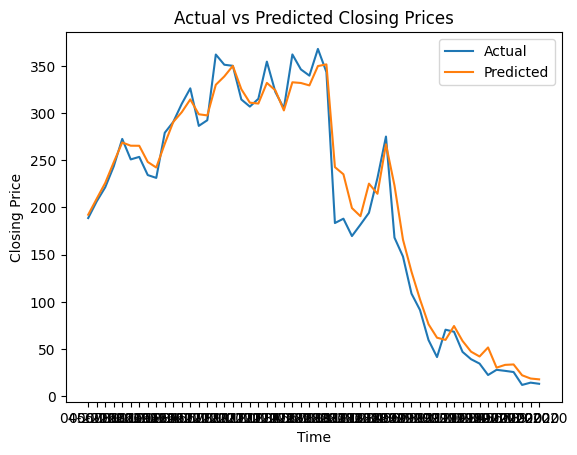

In [ ]:
# Plotting between actual values and  predicted ones.
plt.plot(test_value, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

In [ ]:
# splitting the data into 70:30 ratio & hecking its dimensions
X_train, X_test, Y_train, Y_test = train_test_split(yes.drop('Close',axis=1), yes['Close'], test_size=0.3, random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((129, 3), (56, 3), (129,), (56,))

In [ ]:
# Transfroming data using Min Max Scaler
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1)) # Reshape Y_train to a 2D array
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test.values.reshape(-1, 1)) # Reshape Y_test to a 2D array


In [ ]:
# Creating Linear Regression Model
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [ ]:
# Inverse the transform
pred_y = scaler.inverse_transform(y_pred.reshape(-1,1))
actual_y = scaler.inverse_transform(Y_test)
actual_x = scaler.inverse_transform(X_test)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(actual_y, pred_y)
print("Mean Squared Error:", mse)

Mean Squared Error: 107.57564558629595


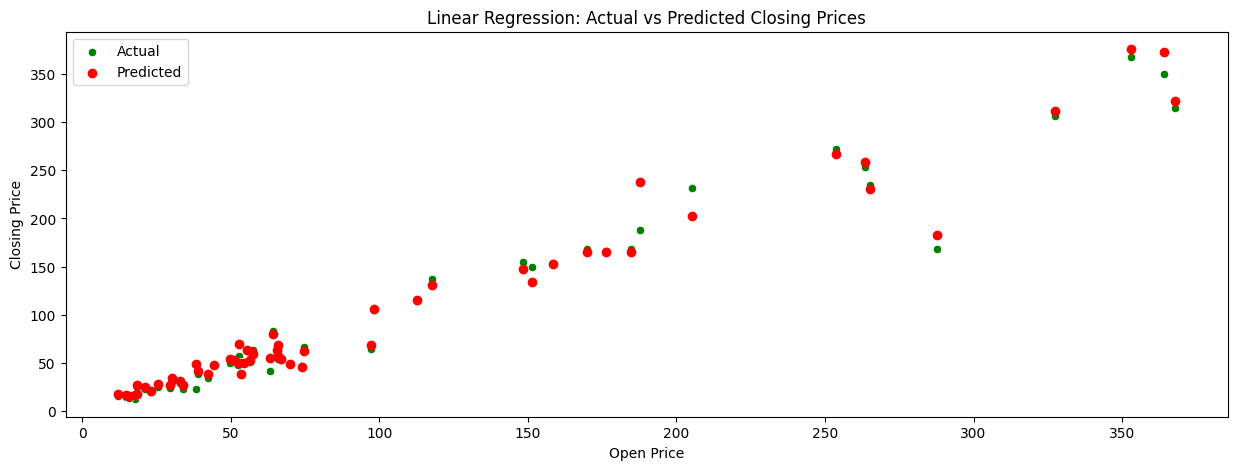

In [ ]:
# Plotting of the graph of Linear Regression
plt.figure(figsize=(15, 5))
sns.scatterplot(x=actual_x[:, 0], y=actual_y.flatten(), label='Actual', color='green')
plt.scatter(actual_x[:, 0], pred_y.flatten(), label='Predicted', color='red')
plt.xlabel('Open Price')
plt.ylabel('Closing Price')
plt.title('Linear Regression: Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

# Conclusion

### **Long Short Term Memory**

*   In this Project I have used two models LSTM & Linear Regression.
*   There was a Monthly data of Yes Bank from 07/2005 to 11/2020.It was a time series data.
*  As time series data has complex patten inolved in it so I have used LSTM  a Deep Learning model for this Yes bank closing price prediction.
* The Date was initially in object data type, I have converted it into DateTime data type and made it as index which is valuable for time series prediction.
* I have splitted the data into 70% and 30% keeping fist part of data for training purpose and rest for testing purpose.
* MinMaxScaler is used for transforming data which is suitable for Models to process data.
* I have used 3 stacked LSTM models each with 200 nodes and 250 back data points for prediction, with 1 dense layer. I have used 100 epochs with batch size of 15 & adam optimiser.
* After using different combination of hyper parameter now my **Mean Squared Error value is 350**, which occured as the last part was very voaltile so this value is closest which i got.



### **Linear Regression**
* The Linear Regression is used with train test split, and the target variable is used as **CLOSE** column.
* As this is time series data so train test split will randomly divide data.
* But after fitting the model while calulating the **Mean Squared Error** the value is about **107**.
* After plotting it was found in graph the model migth be overfitting.

Basically it was found that time series data best works when we divide the data manually in to 70:30 or any ratio. As stock market data has **Seasonal** & **Complex** pattern in it these type of problem can be best solved with model which can capture complex pattern. Among all LSTM is useful model.